### Theory plots

In [15]:
# Import stuff
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from scipy import interpolate 
from code.plot_utils import plot_pretty
from matplotlib import rcParams
rcParams['font.family'] = 'serif' 
%matplotlib inline
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [16]:
# Import the Fisher code (single bin)
from Ang_clust_SINGLE_BIN import Fish_single_bin as FSB

# Import function that calculates the Angular power spectrum in a bin
from Ang_clust_SINGLE_BIN import C_l_i as APS #this means angular power spectrum

# Import function that marginalizes over the the nuisance parameters
from Tools import marginalize as marg

# Import function that calculates the Angular power in a bin for a specific value of \ell
from Tools import C_l_specif as APS_specif

In [17]:
# Let's put here the limits and everything we are going to need for the calculations

z_i = 0.35
z_f = 0.50
z_m = 0.5*(z_i + z_f)
bias = 1.0 + z_m  #Common galaxy bias
z_bias = 0.0

sig_rm = 0.017 #Redshift error of the redMaGiC-like sample
sig_fl = 0.076 #Redshift error of the Flux limited-like sample
N_rm = 0.74e6 # Size of the redMaGiC-like sample
N_fl = 2.94e7 # Size of the flux-limited like sample
omega_m = 0.301  # Fiducial value of Omega_m
sig_8 = 0.798 # Fiducial value of sigma_8

f_sky = 5000/41253.0
ster = f_sky*(4.0*np.pi)

In [18]:
# A module to calculate l_max
import camb
from camb import model, initialpower

Omega_m = 0.301
sigma_8 = 0.798
h = 0.682
    
#Setting up cosmology - need to calculate chis
# Setting up cosmology
    
cosmo = camb.CAMBparams()
cosmo.set_cosmology(H0=68.2, ombh2=0.048*(h**2.0), omch2=(Omega_m - 0.048)*(h**2.0), mnu=0.06, omk=0, tau=0.06)
backres = camb.get_background(cosmo)

chi_mean = backres.comoving_radial_distance(z_m)   # comoving distance corresponding to the mean redshift of the bin
k_cutoff= 0.6*h #Cutoff scale in  Mpc^{-1}
l_max = int(round(chi_mean*k_cutoff))

print(l_max)

687


### Plots of $C_\ell$ and $\delta C_\ell$.

In [19]:
# Calculate ell and C_\ell for the RM and FL samples in that bin

ell, C_l_rm = APS(z_i, z_f, sig_rm, z_bias, bias, Omega_m, sig_8) #APS for the redMaGic sample in the bin
ell, C_l_fl = APS(z_i, z_f, sig_fl, z_bias, bias, Omega_m, sig_8) #APS for the flux limited sample in the bin

# Calculate also their errors, \delta C_\ell, using the above formula
prefact = np.sqrt(2.0/(f_sky*(2.0*ell + 1.0)))

delt_C_rm = prefact*(C_l_rm + (ster/N_rm))
delt_C_fl = prefact*(C_l_fl + (ster/N_fl))

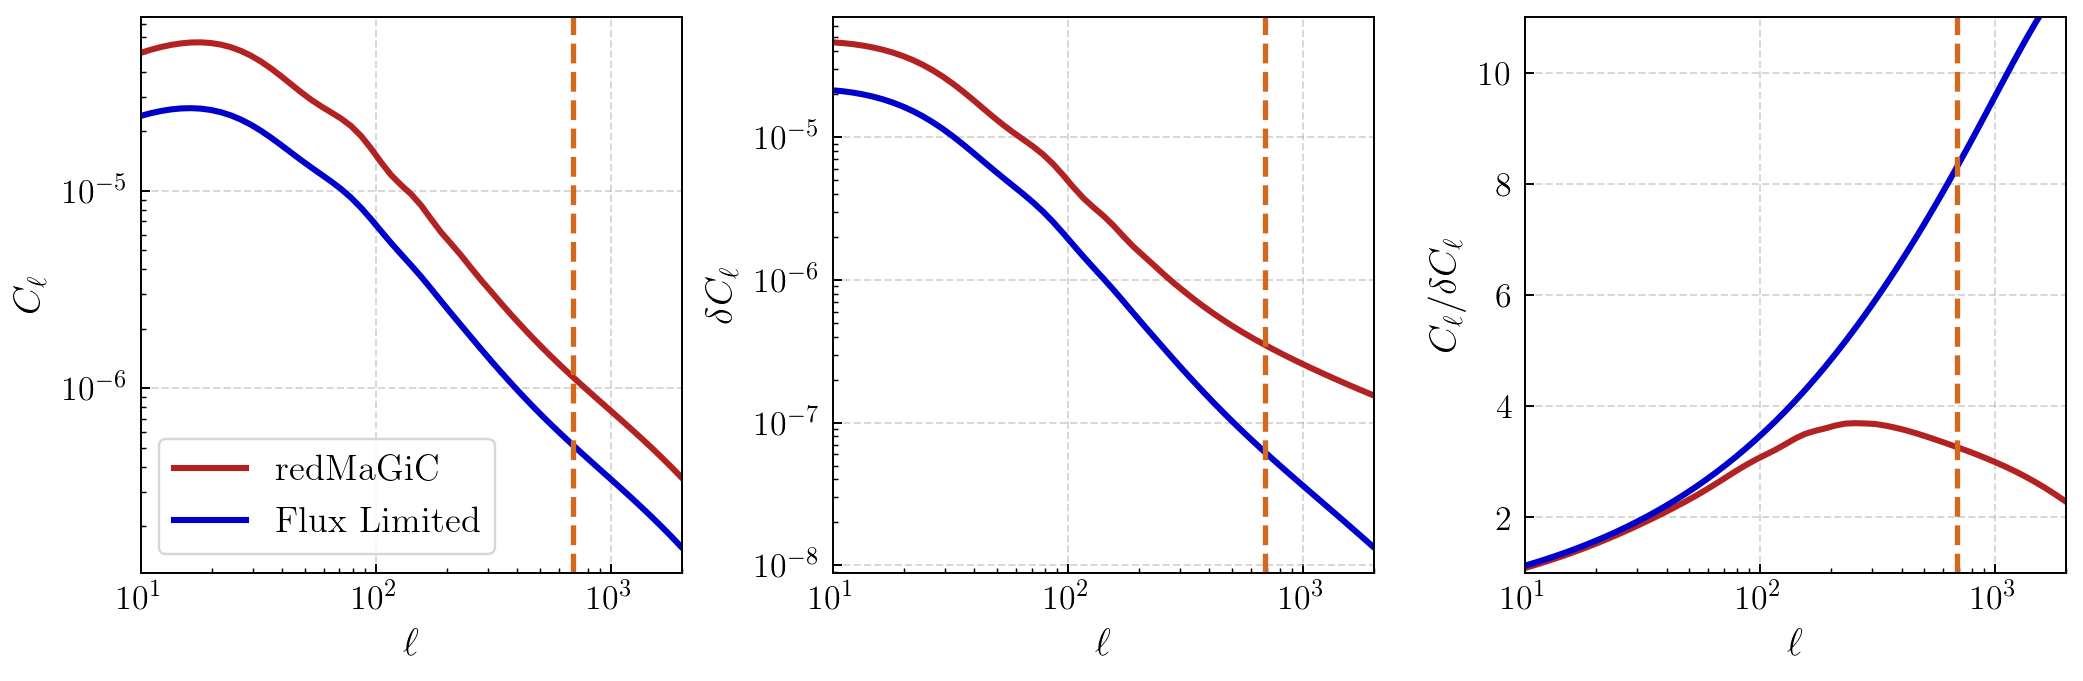

In [20]:
plot_pretty()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (12.0,4.0))

ax[0].plot(ell,C_l_rm, c='firebrick', linewidth=2.5, label='redMaGiC' )
ax[0].plot(ell,C_l_fl, c='mediumblue', linewidth=2.5, label='Flux Limited')
ax[0].set_xscale('log');ax[0].set_yscale('log')
ax[0].set_xlim(10.0,2000.0)
ax[0].set_xlabel(r'$\ell$',fontsize=16);ax[0].set_ylabel('$C_\ell$', fontsize=16)
ax[0].axes.tick_params(axis='both', labelsize=14)
ax[0].legend(frameon=True, loc='lower left', fontsize=15)
ax[0].grid(ls='--', alpha=0.5)
ax[0].axvline(x=l_max, color='chocolate', ls ='--', linewidth=2.2)

#===============================================================================================

ax[1].plot(ell, delt_C_rm, c='firebrick', linewidth=2.5)
ax[1].plot(ell,delt_C_fl, c='mediumblue', linewidth=2.5)
ax[1].set_xscale('log');ax[1].set_yscale('log')
ax[1].set_xlim(10.0,2000.0)#
ax[1].set_xlabel('$\ell$',fontsize=16);ax[1].set_ylabel('$\delta C_\ell$', fontsize=16)
ax[1].axes.tick_params(axis='both', labelsize=14)
ax[1].grid(ls='--', alpha=0.5)
ax[1].axvline(x=l_max, color='chocolate', ls='--', linewidth=2.2)
#=============================================================================

ax[2].plot(ell, C_l_rm/delt_C_rm, c='firebrick', linewidth=2.5)
ax[2].plot(ell, C_l_fl/delt_C_fl, c='mediumblue', linewidth=2.5)
ax[2].set_xscale('log')#;ax[1].set_yscale('log')
ax[2].set_xlim(10.0,2000.0),ax[2].set_ylim(1.0,11.0)
ax[2].set_xlabel('$\ell$',fontsize=16);ax[2].set_ylabel('$C_\ell/\delta C_\ell$', fontsize=16)
ax[2].axes.tick_params(axis='both', labelsize=14)
ax[2].grid(ls='--', alpha=0.5)
ax[2].axvline(x=l_max, color='chocolate', ls='--', linewidth= 2.2)

plt.tight_layout()
#plt.savefig('C_l_delt_l.pdf')
plt.show()

### Effect of uncertainty in the photo-z parameters



In [21]:
ell, C_ell_fid = APS(z_i, z_f, sig_fl, z_bias, bias, Omega_m, sig_8)
ell, C_ell_high_Om = APS(z_i, z_f, sig_fl, z_bias, bias, Omega_m+2, sig_8)
ell, C_ell_low_Om = APS(z_i, z_f, sig_fl, z_bias, bias, Omega_m-2, sig_8)
ell, C_ell_high_red = APS(z_i, z_f, sig_fl+0.013, z_bias+0.013, bias, Omega_m, sig_8)
ell, C_ell_low_red = APS(z_i, z_f, sig_fl-0.013, z_bias-0.013, bias, Omega_m, sig_8)
ell, C_ell_high_s_8 = APS(z_i, z_f, sig_fl, z_bias, bias, Omega_m, sig_8+2)
ell, C_ell_low_s_8 = APS(z_i, z_f, sig_fl, z_bias, bias, Omega_m, sig_8-2)

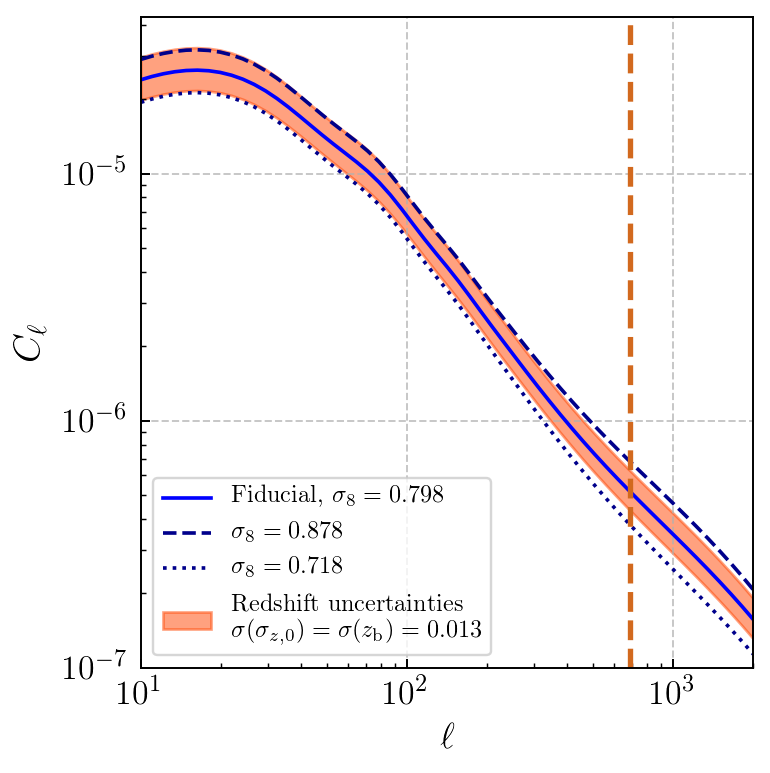

In [22]:
fig = plt.figure(figsize = (4.5,4.5))

plt.plot(ell, C_ell_fid, c='blue', label=r'Fiducial, $\sigma_8 = 0.798$')
plt.plot(ell, C_ell_high_s_8, c='darkblue', ls='--', label='$\sigma_8 = 0.878$')
plt.plot(ell, C_ell_low_s_8, c='darkblue', ls=':', label='$\sigma_8 = 0.718$')
#plt.plot(ell, C_ell_high_s_8, c='darkred', ls='-.', label='Higher $\sigma_8$')
#plt.plot(ell, C_ell_low_s_8, c='darkred', ls='-.', label='Lower $\sigma_8$')
plt.fill_between(ell, C_ell_high_red, C_ell_low_red,  color = 'orangered',  alpha=0.5, linewidth=1.1, label='Redshift uncertainties \n $\sigma(\sigma_{z,0}) = \sigma(z_{\mbox{\scriptsize{b}}}) = 0.013$')
#plt.plot(ell, C_ell_low_red, c='orangered', ls='--', linewidth=1.1)
#plt.vlines(l_max,0,11, color='chocolate', linestyle='--', linewidth= 2.2)
plt.axvline(x=l_max, color='chocolate', ls='--', linewidth= 2.2)
plt.grid(ls='--', alpha=0.7)
plt.xscale('log');plt.yscale('log')
plt.xlim(10.0,2000);plt.ylim(1e-7,)

plt.ylabel('$C_\ell$',fontsize=16)
plt.xlabel('$\ell$',fontsize=15)
plt.tick_params(axis='both', labelsize=14)

plt.legend(frameon=True, loc='lower left', fontsize=10)
plt.tight_layout()
plt.savefig('Red_uncert.pdf')
plt.show()